### Verbrauch von Autos vorhersagen

#### Aufgabe:

Eine Firma hat ein neues Auto angekündigt, aber noch keine Verbrauchsdaten angegeben. Kannst du den Verbrauch (in l/100km) des Autos schätzen, indem du ein Modell trainierst?

Das Auto hat:

- 8 Zylinder
- 200PS
- 2500kg

Lese dazu die Datei `mpg-dataset.csv` ein. Trainiere anschließend ein Modell, und sage den Verbrauch (in l/100km) dieses Autos vorher!

In [6]:
def mpg_to_l_per_100km(mpg):
    LITERS_PER_GALLON = 3.785411784
    KILOMETERS_PER_MILES = 1.609344

    return (100 * LITERS_PER_GALLON) / (KILOMETERS_PER_MILES * mpg)

print(mpg_to_l_per_100km(100))

2.352145833333333


In [7]:
import pandas as pd

df = pd.read_csv("mpg-dataset.csv")

In [11]:
X = df[["cylinders", "horsepower", "weight"]]
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
y = mpg_to_l_per_100km(df["mpg"])

In [12]:
# Aufgabe: Hier Lineare Regression trainieren
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
print(model.predict([
    [8, 200, 2500]
]))

[13.98766161]


/home/alex/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


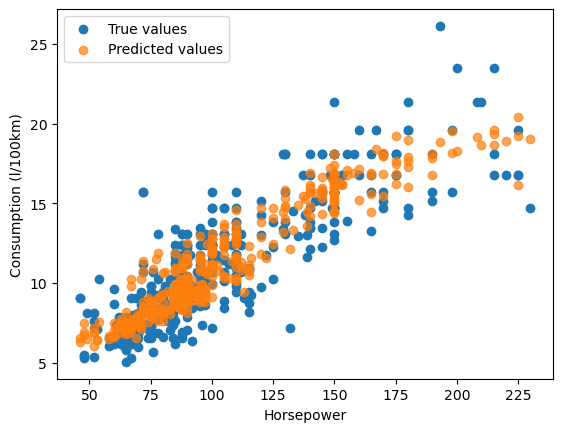

In [15]:
from matplotlib import pyplot as plt

# Plot horsepower vs. consumption
plt.scatter(X["horsepower"], y, label="True values")
plt.scatter(X["horsepower"], model.predict(X), label="Predicted values", alpha=0.7)
plt.xlabel("Horsepower")
plt.ylabel("Consumption (l/100km)")
plt.legend()
plt.show()